In [117]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.layers.Dense(units=120,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(units=40,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(units=1,activation="linear") # burada relu da olabilir çünki production => 0 . negatif olamaz
    ], name="Xalil"
)
model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001))



In [111]:

#df = pd.ExcelFile('C:/Users/halil/Desktop/soalr_data.xlsx').parse('sheet 1')
weather_raw = pd.read_excel('C:/Users/halil/Desktop/soalr_data.xlsx',sheet_name="weather")
guneko_raw = pd.read_excel('C:/Users/halil/Desktop/soalr_data.xlsx',sheet_name="1000255-GUNEKO")

guneko_production = guneko_raw[["Date","Production"]]
guneko_gti = guneko_raw[["Date.1","GTI"]]


weather_guneko = weather_raw.loc[weather_raw.name ==1000255]
ali = pd.merge(guneko_production,weather_guneko,left_on="Date",right_on="date")
dataset = ali.drop(["name","date","lat","lon"],axis=1)

In [4]:
dataset.head()

,Date,Production,temperature,cloud cover,global_rad:W,diffuse_rad:W,direct_rad:W,relative_humidity_2m:p,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,sun_elevation:d
0,2020-01-01 00:00:00,0.0,6.1,32.7,0.0,0.0,0.0,94.5,0.5,1.0,6.1,-74.4
1,2020-01-01 01:00:00,0.0,5.1,24.1,0.0,0.0,0.0,97.6,0.9,1.0,5.1,-74.2
2,2020-01-01 02:00:00,0.0,4.3,17.5,0.0,0.0,0.0,98.6,1.0,1.0,4.3,-65.7
3,2020-01-01 03:00:00,0.0,3.9,12.0,0.0,0.0,0.0,98.6,0.9,1.0,3.9,-55.2
4,2020-01-01 04:00:00,0.0,2.4,81.7,0.0,0.0,0.0,100.0,1.0,1.0,2.4,-43.4


In [93]:
X = dataset.drop(["Production"],axis=1)
Y = dataset["Production"]


date_time = pd.to_datetime(X.pop('Date'), format='%d.%m.%Y %H:%M:%S')
timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
#month = day*30 
year = (365.2425)*day

X['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
X['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
X['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
X['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

x_train = X[:15000]
y_train = Y[:15000]

x_test = X[15000:18000]
x_test = Y[15000:18000]


In [31]:
def draw(column,till,start=0):
    plot_cols = ["Production",column]
    plot_features = dataset[plot_cols][start:till]
    plot_features.index = dataset["Date"][start:till]
    _ = plot_features.plot(subplots=True)

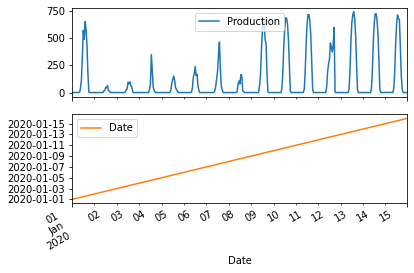

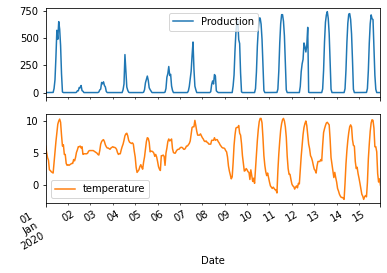

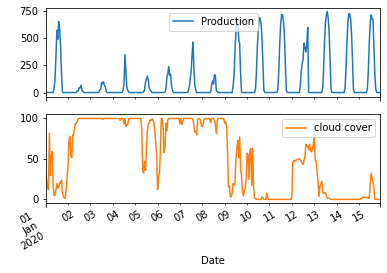

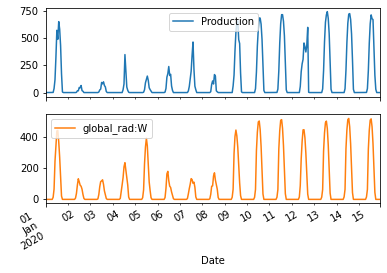

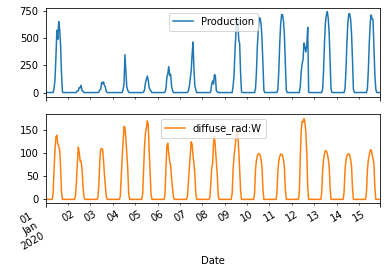

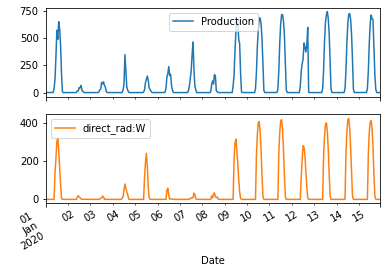

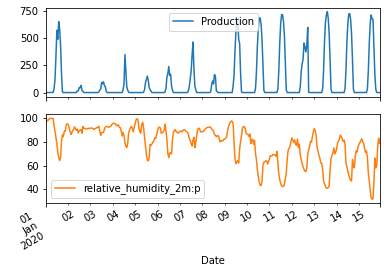

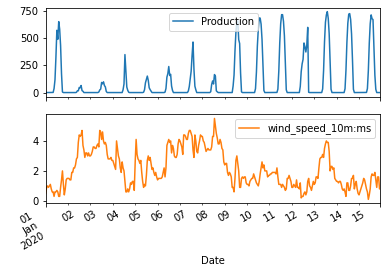

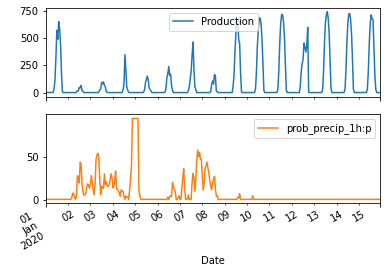

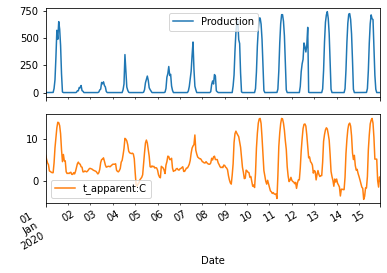

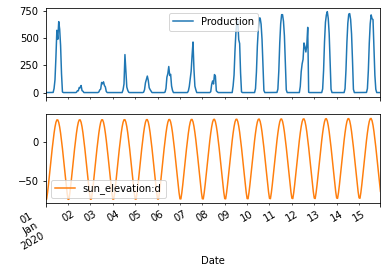

In [32]:
for i in dataset.columns:
    if i =="Production":
        continue
    draw(i,360)

Text(0.5, 1.0, 'Time of day signal')

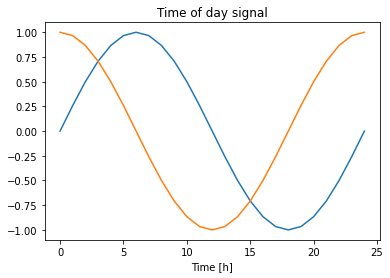

In [94]:
plt.plot(np.array(x_train['Day sin'])[:25]) # 24 saatlik değerlerin değişimi
plt.plot(np.array(x_train['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [112]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.layers.Dense(units=120,activation="relu"),
        tf.keras.layers.Dense(units=40,activation="relu"),
        tf.keras.layers.Dense(units=1,activation="linear") # burada relu da olabilir çünki production => 0 . negatif olamaz
    ], name="Xalil"
)
model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.003))



In [ ]:
"""import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)"""

model.fit(x_train,y_train,epochs=1000)

"""model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")"""

In [113]:
"""X = dataset.drop(["Production"],axis=1)
Y = dataset["Production"]"""

df = dataset 

date_time = pd.to_datetime(df.pop('Date'), format='%d.%m.%Y %H:%M:%S')
timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
#month = day*30 
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

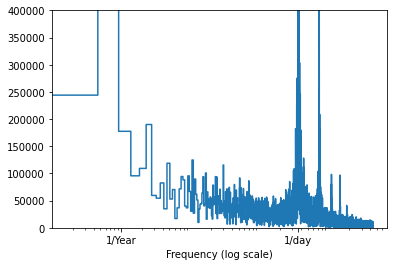

In [114]:
fft = tf.signal.rfft(df['Production'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['Production'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [115]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [116]:
train_mean

Production                196.248480
temperature                17.461411
cloud cover                26.091932
global_rad:W              214.003947
diffuse_rad:W              59.976000
direct_rad:W              154.028518
relative_humidity_2m:p     52.310019
wind_speed_10m:ms           2.304420
prob_precip_1h:p            3.436608
t_apparent:C               17.889644
sun_elevation:d             1.184938
Day sin                     0.000620
Day cos                     0.000077
Year sin                    0.198710
Year cos                   -0.026357
dtype: float64

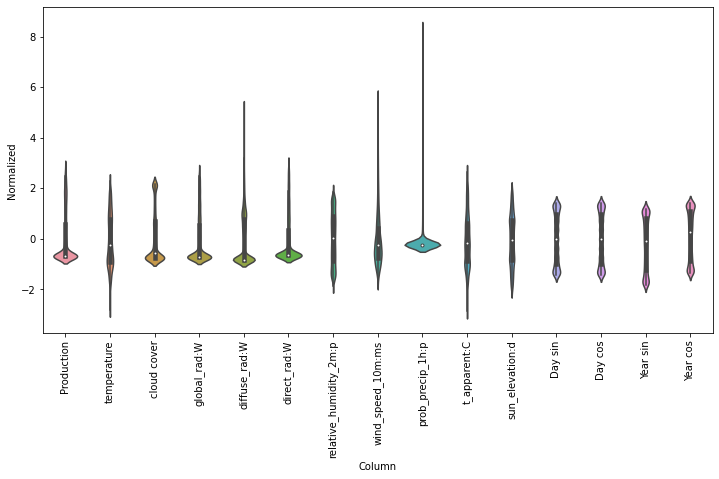

In [118]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [119]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [120]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Production'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Production']

In [124]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['Production'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Production']

In [121]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [125]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 15)
Inputs shape: (3, 6, 15)
Labels shape: (3, 1, 1)


In [126]:
w2.example = example_inputs, example_labels

In [129]:
def plot(self, model=None, plot_col='Production', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [131]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [133]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [157]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Production'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Production']

In [160]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [182]:
baseline = Baseline(label_index=column_indices['Production'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

119/119 [==============================] - 0s 1ms/step - loss: 0.1754 - mean_absolute_error: 0.2418


In [183]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Production'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Production']

In [188]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 15)
Output shape: (32, 24, 1)


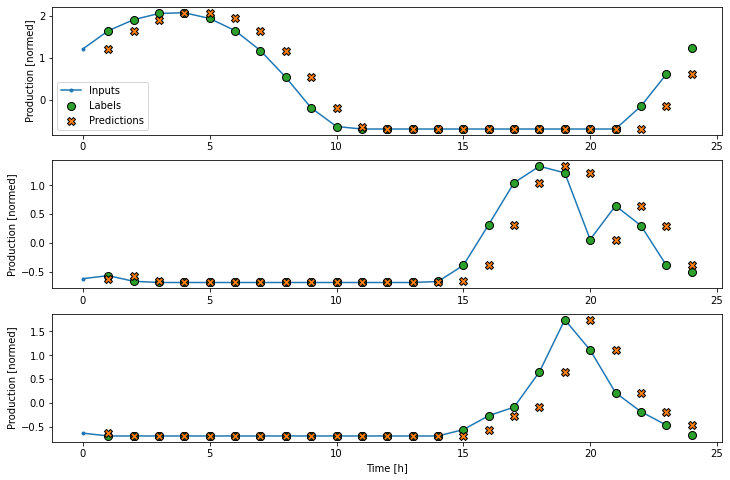

In [189]:
wide_window.plot(baseline)

In [184]:
linear = tf.keras.Sequential([tf.keras.layers.Dense(units=1)])

In [190]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 15)
Output shape: (32, 1, 1)


In [185]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,validation_data=window.val,callbacks=[early_stopping])
  return history

In [186]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
417/417 [==============================] - 1s 2ms/step - loss: 1.4346 - mean_absolute_error: 0.9603 - val_loss: 0.5961 - val_mean_absolute_error: 0.6232
Epoch 2/20
417/417 [==============================] - 1s 1ms/step - loss: 0.2266 - mean_absolute_error: 0.3575 - val_loss: 0.2277 - val_mean_absolute_error: 0.3564
Epoch 3/20
417/417 [==============================] - 1s 2ms/step - loss: 0.1366 - mean_absolute_error: 0.2467 - val_loss: 0.1628 - val_mean_absolute_error: 0.2935
Epoch 4/20
417/417 [==============================] - 1s 1ms/step - loss: 0.1156 - mean_absolute_error: 0.2158 - val_loss: 0.1364 - val_mean_absolute_error: 0.2598
Epoch 5/20
417/417 [==============================] - 1s 1ms/step - loss: 0.1023 - mean_absolute_error: 0.1966 - val_loss: 0.1210 - val_mean_absolute_error: 0.2382
Epoch 6/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0923 - mean_absolute_error: 0.1833 - val_loss: 0.1064 - val_mean_absolute_error: 0.2190
Epoch 7/20
417/4

In [191]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 15)
Output shape: (32, 24, 1)


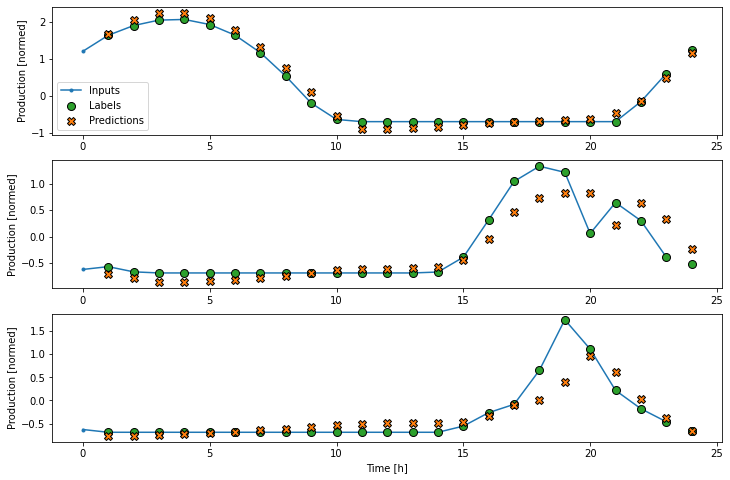

In [192]:
wide_window.plot(linear)

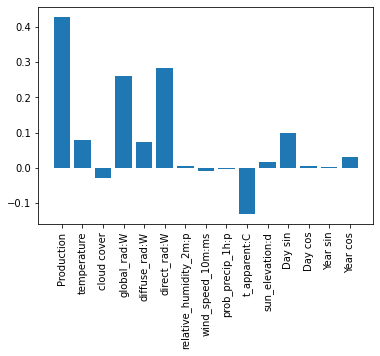

In [193]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [194]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
417/417 [==============================] - 2s 3ms/step - loss: 0.0886 - mean_absolute_error: 0.1561 - val_loss: 0.0359 - val_mean_absolute_error: 0.1169
Epoch 2/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0531 - mean_absolute_error: 0.1138 - val_loss: 0.0644 - val_mean_absolute_error: 0.1686
Epoch 3/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0508 - mean_absolute_error: 0.1077 - val_loss: 0.0328 - val_mean_absolute_error: 0.0997
Epoch 4/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0495 - mean_absolute_error: 0.1038 - val_loss: 0.0404 - val_mean_absolute_error: 0.1183
Epoch 5/20
119/119 [==============================] - 0s 1ms/step - loss: 0.0364 - mean_absolute_error: 0.1086


In [195]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Production'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Production']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

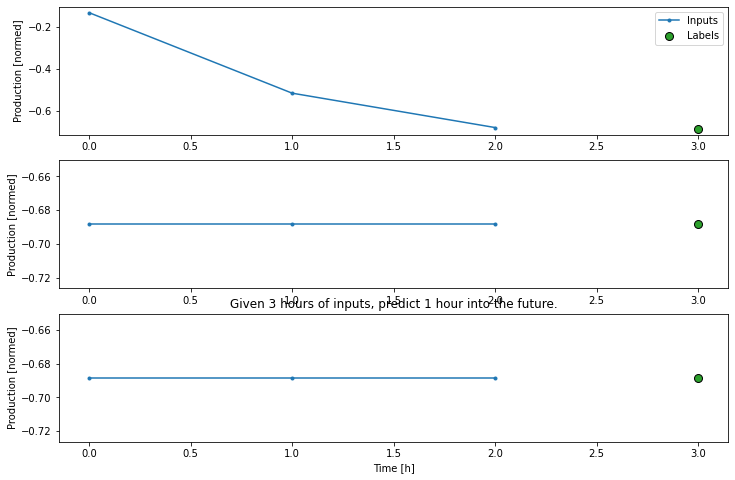

In [196]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [197]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [198]:
history = compile_and_fit(multi_step_dense, conv_window)


val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

Epoch 1/20
417/417 [==============================] - 1s 2ms/step - loss: 0.1176 - mean_absolute_error: 0.1999 - val_loss: 0.0746 - val_mean_absolute_error: 0.1652
Epoch 2/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0601 - mean_absolute_error: 0.1272 - val_loss: 0.0589 - val_mean_absolute_error: 0.1420
Epoch 3/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0564 - mean_absolute_error: 0.1201 - val_loss: 0.0607 - val_mean_absolute_error: 0.1447
Epoch 4/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0538 - mean_absolute_error: 0.1138 - val_loss: 0.0542 - val_mean_absolute_error: 0.1341
Epoch 5/20
417/417 [==============================] - 1s 1ms/step - loss: 0.0527 - mean_absolute_error: 0.1107 - val_loss: 0.0446 - val_mean_absolute_error: 0.1111
Epoch 6/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0514 - mean_absolute_error: 0.1075 - val_loss: 0.0531 - val_mean_absolute_error: 0.1336
Epoch 7/20
417/4

In [199]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 15)
Output shape: (32, 1, 1)


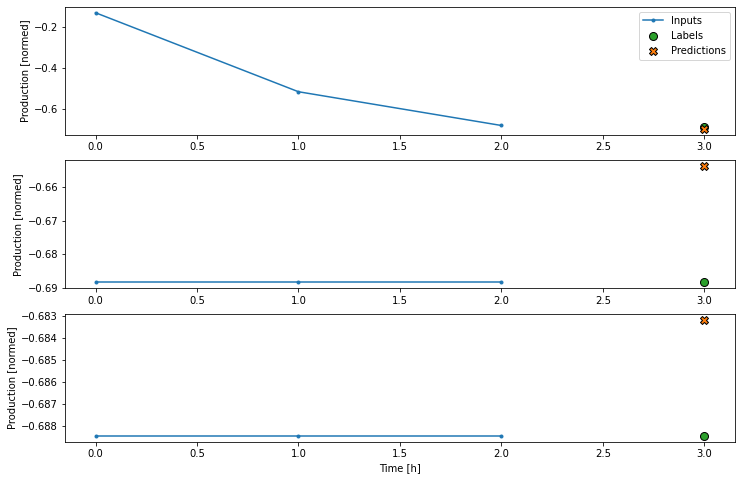

In [201]:
conv_window.plot(multi_step_dense)

In [202]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 15)

ValueError:Input 0 of layer dense_72 is incompatible with the layer: expected axis -1 of input shape to have value 45 but received input with shape (32, 360)


In [205]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [206]:
history = compile_and_fit(conv_model, conv_window)

val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Epoch 1/20
417/417 [==============================] - 2s 2ms/step - loss: 0.0974 - mean_absolute_error: 0.1749 - val_loss: 0.0534 - val_mean_absolute_error: 0.1466
Epoch 2/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0566 - mean_absolute_error: 0.1223 - val_loss: 0.0458 - val_mean_absolute_error: 0.1252
Epoch 3/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0530 - mean_absolute_error: 0.1134 - val_loss: 0.0441 - val_mean_absolute_error: 0.1211
Epoch 4/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0522 - mean_absolute_error: 0.1103 - val_loss: 0.0370 - val_mean_absolute_error: 0.1002
Epoch 5/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0506 - mean_absolute_error: 0.1083 - val_loss: 0.0464 - val_mean_absolute_error: 0.1247
Epoch 6/20
417/417 [==============================] - 1s 1ms/step - loss: 0.0498 - mean_absolute_error: 0.1056 - val_loss: 0.0367 - val_mean_absolute_error: 0.0982
Epoch 7/20
417/4

In [207]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 15)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [209]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Production'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['Production']

In [210]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 15)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


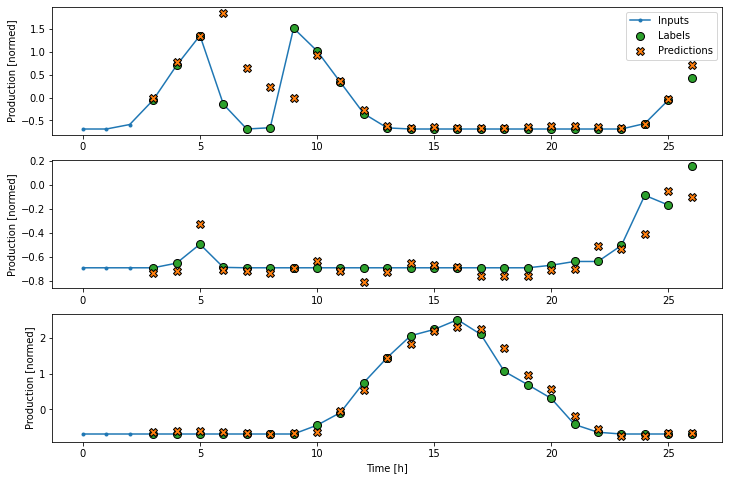

In [211]:
wide_conv_window.plot(conv_model)


Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

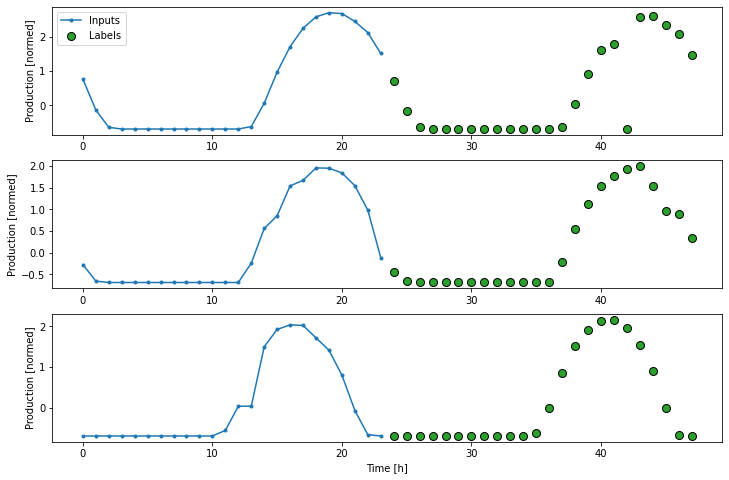

In [220]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

Epoch 1/20
415/415 [==============================] - 2s 3ms/step - loss: 0.2343 - mean_absolute_error: 0.2712 - val_loss: 0.1797 - val_mean_absolute_error: 0.2157
Epoch 2/20
415/415 [==============================] - 1s 3ms/step - loss: 0.1826 - mean_absolute_error: 0.2108 - val_loss: 0.1757 - val_mean_absolute_error: 0.2040
Epoch 3/20
415/415 [==============================] - 1s 3ms/step - loss: 0.1791 - mean_absolute_error: 0.2057 - val_loss: 0.1752 - val_mean_absolute_error: 0.2035
Epoch 4/20
415/415 [==============================] - 1s 3ms/step - loss: 0.1768 - mean_absolute_error: 0.2025 - val_loss: 0.1742 - val_mean_absolute_error: 0.2006
Epoch 5/20
415/415 [==============================] - 1s 3ms/step - loss: 0.1750 - mean_absolute_error: 0.2000 - val_loss: 0.1746 - val_mean_absolute_error: 0.2017
Epoch 6/20
118/118 [==============================] - 0s 2ms/step - loss: 0.1747 - mean_absolute_error: 0.1987


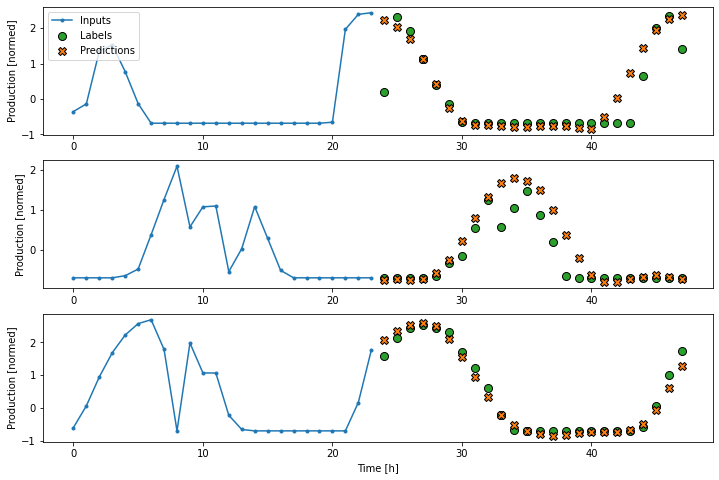

In [218]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(OUT_STEPS*num_features,kernel_initializer=tf.initializers.zeros()),

    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)




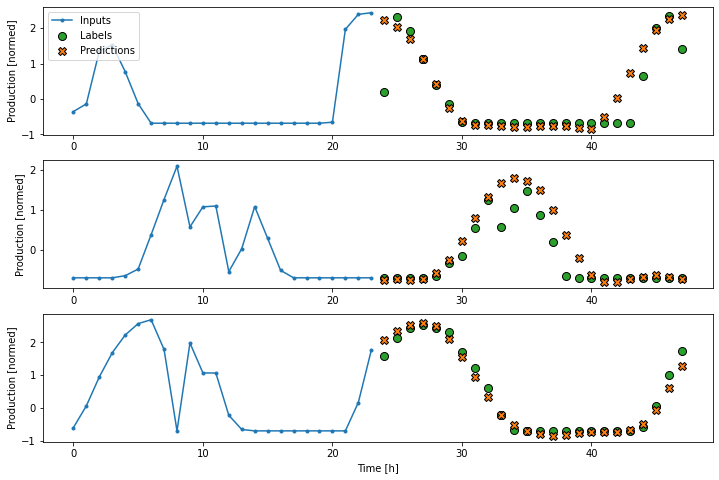

In [219]:

multi_window.plot(multi_dense_model)